In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


In [80]:
train_data = pd.read_csv('Data set/DUMD_train.csv')
test_data = pd.read_csv('Data set/DUMD_test.csv')

In [81]:
test_data

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High
...,...,...,...,...,...,...
75,0.520,0.440,0.820,0.30,0.52,Medium
76,0.288,0.310,0.790,0.23,0.24,Low
77,0.260,0.260,0.310,0.26,0.13,Very Low
78,0.990,0.490,0.070,0.70,0.69,High


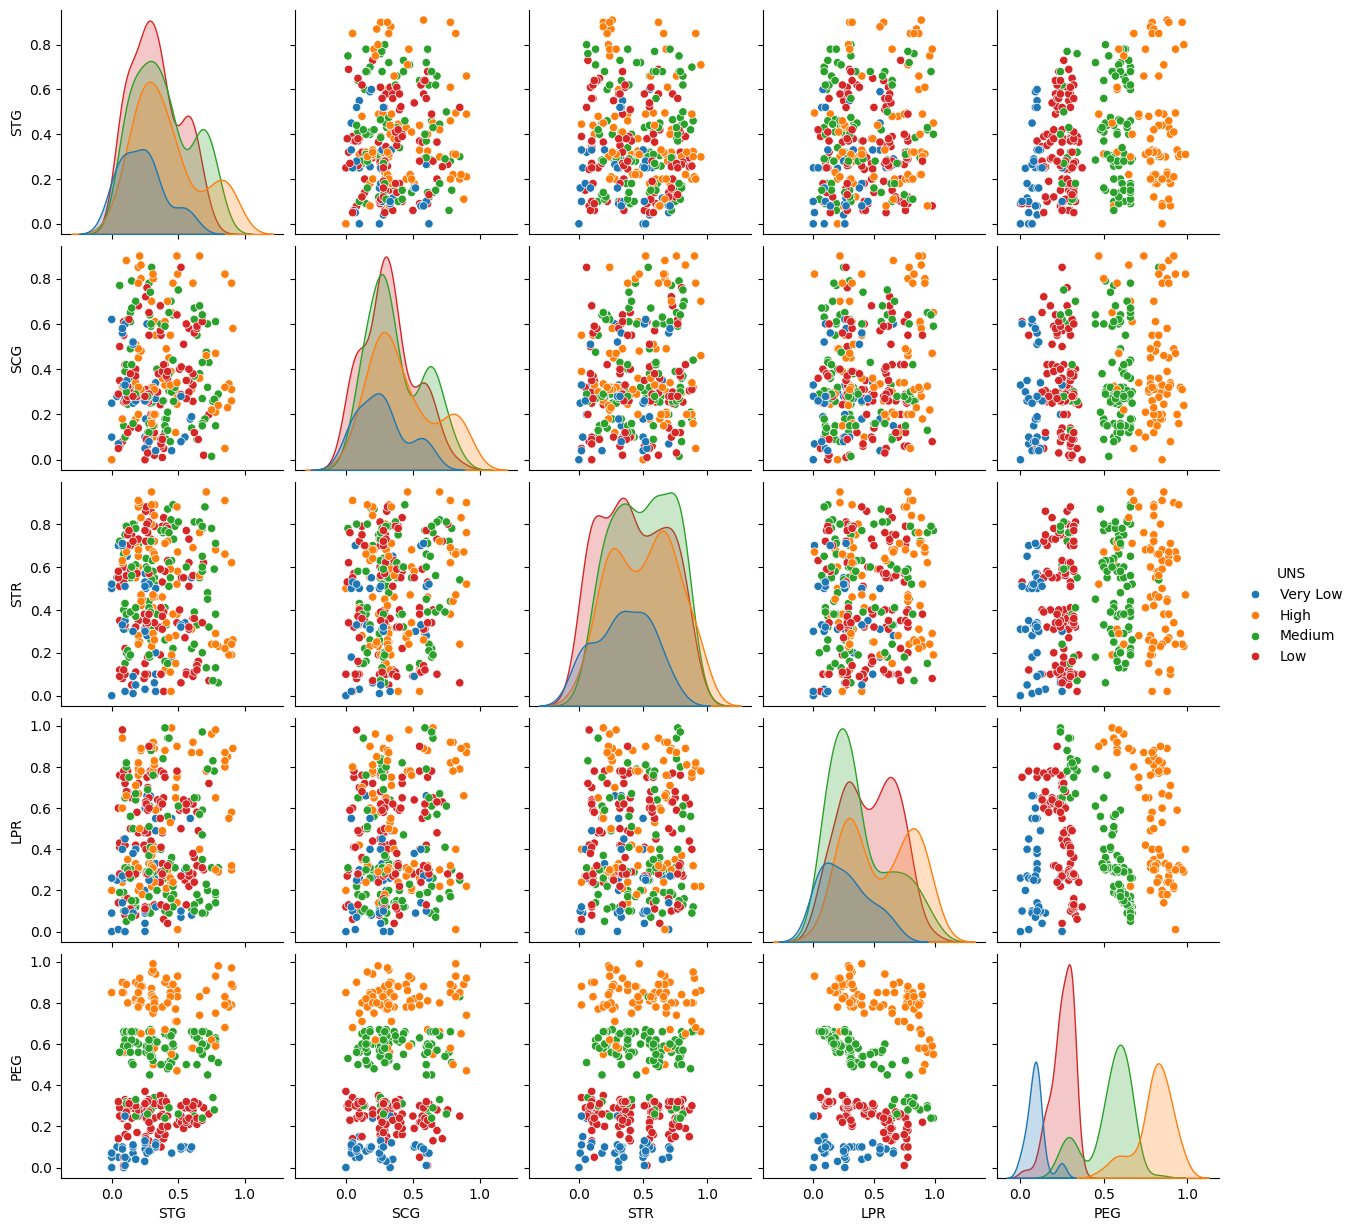

In [82]:
sns.pairplot(train_data, hue='UNS')

In [83]:
x=pd.DataFrame(train_data)
y=pd.DataFrame(test_data)
print(x)

      STG   SCG   STR   LPR   PEG       UNS
0    0.00  0.00  0.00  0.00  0.00  Very Low
1    0.08  0.08  0.10  0.24  0.90      High
2    0.10  0.10  0.15  0.65  0.30    Medium
3    0.08  0.08  0.08  0.98  0.24       Low
4    0.09  0.15  0.40  0.10  0.66    Medium
..    ...   ...   ...   ...   ...       ...
318  0.90  0.78  0.62  0.32  0.89      High
319  0.85  0.82  0.66  0.83  0.83      High
320  0.56  0.60  0.77  0.13  0.32       Low
321  0.66  0.68  0.81  0.57  0.57    Medium
322  0.68  0.64  0.79  0.97  0.24    Medium

[323 rows x 6 columns]


In [84]:
#label Encoded
le = LabelEncoder()
x['UNS']=le.fit_transform(x['UNS'])
y['UNS']=le.fit_transform(y['UNS'])

<Axes: >

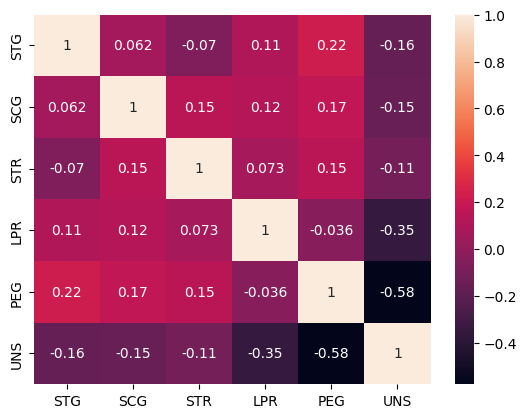

In [85]:
sns.heatmap( x.corr(), annot=True)

In [86]:
x

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,0
319,0.85,0.82,0.66,0.83,0.83,0
320,0.56,0.60,0.77,0.13,0.32,1
321,0.66,0.68,0.81,0.57,0.57,2


In [87]:
x_train=x.loc[:,'STG':'PEG']
y_train=x.loc[:,'UNS']

x_test=y.loc[:,'STG':'PEG']
y_test=y.loc[:,'UNS']

In [88]:
x

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2
...,...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89,0
319,0.85,0.82,0.66,0.83,0.83,0
320,0.56,0.60,0.77,0.13,0.32,1
321,0.66,0.68,0.81,0.57,0.57,2


In [89]:
x_train=x.loc[:,'LPR':'PEG']
x_test=y.loc[:,'LPR':'PEG']

print(x_test) 
print(x_test)


     LPR   PEG
0   0.03  0.68
1   0.78  0.34
2   0.17  0.64
3   0.25  0.08
4   0.33  0.77
..   ...   ...
75  0.30  0.52
76  0.23  0.24
77  0.26  0.13
78  0.70  0.69
79  0.64  0.10

[80 rows x 2 columns]
     LPR   PEG
0   0.03  0.68
1   0.78  0.34
2   0.17  0.64
3   0.25  0.08
4   0.33  0.77
..   ...   ...
75  0.30  0.52
76  0.23  0.24
77  0.26  0.13
78  0.70  0.69
79  0.64  0.10

[80 rows x 2 columns]


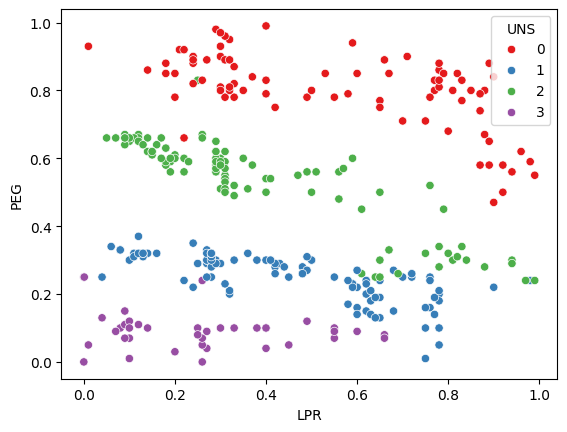

In [90]:
sns.scatterplot(x=x_train['LPR'],y=x_train['PEG'],hue=x['UNS'],palette='Set1')
plt.show()

In [91]:
def evaluation(y_test,y_pred,n):
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
    plt.title(f"Confusion matrix of class {n}")
    plt.xlabel("Predication")
    plt.ylabel("Actual")
    plt.show()
    
    print(f'classification report of class {n} \n {classification_report(y_test,y_pred)}')
    return

In [92]:
def model_OVR(x_train,y_train,x_test,y_test,n):
    model=SVC(kernel='rbf',probability=True)
    model.fit(x_train,y_train)
    pred=model.predict_proba(x_test)[:,1].reshape(-1,1)
    predication=model.predict(x_test)
    evaluation(y_test,predication,n)
    return pred,model 

In [93]:
def model_OVO(x_train,y_train,x_test,y_test,n):
    model=SVC(kernel='rbf',probability=True)
    model.fit(x_train,y_train)
    pred=model.predict_proba(x_test)
    predication=model.predict(x_test)
    evaluation(y_test,predication,n)
    return pred,model 

In [94]:
new_y_test=pd.get_dummies(y_test)
new_y_train=pd.get_dummies(y_train)

In [95]:
new_y_test

,0,1,2,3
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
75,False,False,True,False
76,False,True,False,False
77,False,False,False,True
78,True,False,False,False


# #Class 0

In [96]:
new_y_train=new_y_train.to_numpy()
new_y_test=new_y_test.to_numpy()

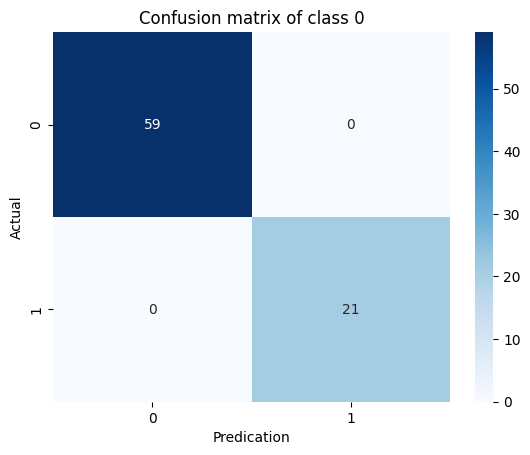

classification report of class 0 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        59
        True       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [97]:
pred0,model=model_OVR(x_train,new_y_train[:,0],x_test,new_y_test[:,0],0)

# #class1

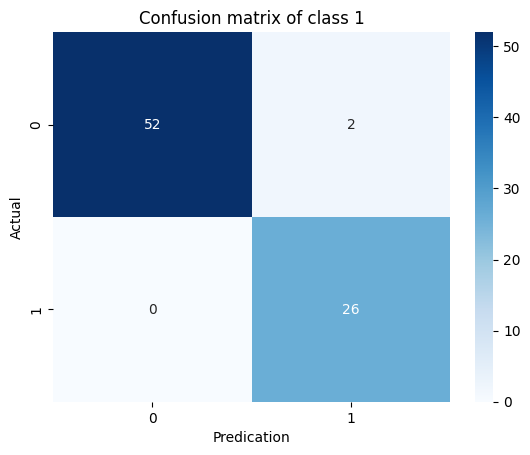

classification report of class 1 
               precision    recall  f1-score   support

       False       1.00      0.96      0.98        54
        True       0.93      1.00      0.96        26

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [98]:
pred1,model=model_OVR(x_train,new_y_train[:,1],x_test,new_y_test[:,1],1)

# #Class2

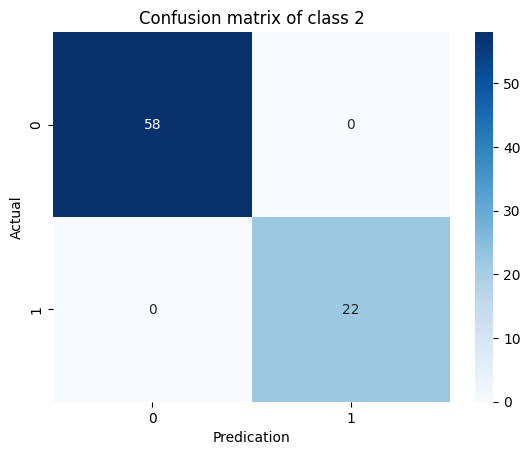

classification report of class 2 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        58
        True       1.00      1.00      1.00        22

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [99]:
pred2,model=model_OVR(x_train,new_y_train[:,2],x_test,new_y_test[:,2],2)

# #Class3

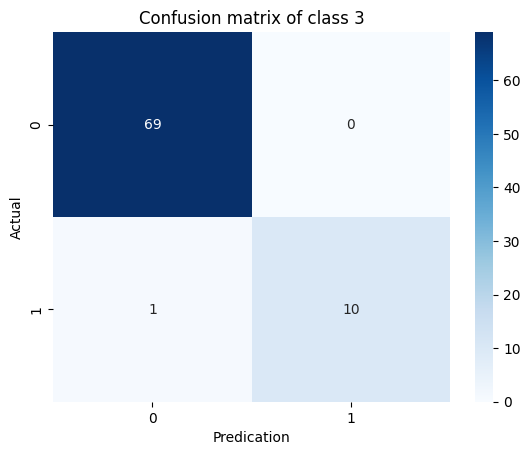

classification report of class 3 
               precision    recall  f1-score   support

       False       0.99      1.00      0.99        69
        True       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.95      0.97        80
weighted avg       0.99      0.99      0.99        80



In [100]:
pred3,model=model_OVR(x_train,new_y_train[:,3],x_test,new_y_test[:,3],3)

In [101]:
yp=np.hstack((pred0,pred1,pred2,pred3))
yp

array([[3.20103993e-02, 4.05351099e-03, 9.48904384e-01, 8.01558415e-03],
       [8.05186013e-03, 4.54788251e-02, 9.18430298e-01, 4.29648062e-04],
       [1.49855201e-02, 1.21559086e-03, 9.75309960e-01, 1.26088839e-03],
       [1.24769362e-02, 5.13709246e-03, 1.83185928e-04, 9.96293459e-01],
       [8.96630837e-01, 2.65056989e-05, 1.51526829e-01, 5.77654504e-03],
       [9.91194117e-01, 4.87747603e-05, 4.03562889e-03, 2.29551031e-02],
       [9.42762395e-04, 5.90932359e-02, 9.45190705e-01, 1.01889317e-04],
       [9.87546721e-01, 4.35755964e-05, 1.21678963e-02, 1.30152634e-02],
       [8.94187839e-04, 9.21634216e-01, 1.23082136e-02, 3.16829756e-03],
       [9.19549146e-03, 5.11497269e-04, 9.75199385e-01, 2.61714757e-04],
       [1.10892067e-03, 4.84687243e-02, 9.50277310e-01, 1.12361141e-04],
       [1.69667205e-03, 6.85839837e-01, 4.30883014e-01, 4.52493518e-04],
       [9.30408043e-01, 1.09435991e-04, 1.10834766e-01, 1.15421154e-02],
       [8.29284487e-03, 4.18761979e-02, 1.96909916e

In [102]:
mm = np.argmax(yp,axis=1)
ff=mm.reshape(-1,1)
ff

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]], dtype=int64)

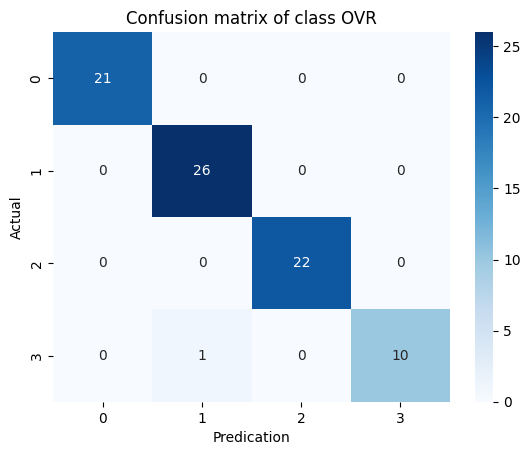

classification report of class OVR 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



In [103]:
evaluation(y_test,ff,'OVR')

# # OVO Problem

In [104]:
df01_train=x.loc[(x['UNS']==0)|(x['UNS']==1)]
x_train01=df01_train.loc[:,'LPR':'PEG'].values
y_train01=df01_train.loc[:,'UNS'].values

df02_train=x.loc[(x["UNS"]==0)|(x['UNS']==2)]
x_train02=df02_train.loc[:,'LPR':'PEG'].values
y_train02=df02_train.loc[:,'UNS'].values

df03_train = x.loc[(x['UNS'] == 0) | (x['UNS'] == 3)]
x_train_03=df03_train.loc[:,'LPR':'PEG'].values
y_train_03=df03_train.loc[:,'UNS'].values

df12_train=x.loc[(x["UNS"]==1)|(x['UNS']==2)]
x_train12=df12_train.loc[:,"LPR":'PEG'].values
y_train12=df12_train.loc[:,"UNS"].values

df13_train=x.loc[(x["UNS"]==1)|(x['UNS']==3)]
x_train13=df13_train.loc[:,"LPR":'PEG'].values
y_train13=df13_train.loc[:,"UNS"].values

df23_train = x.loc[(x['UNS'] == 2) | (x['UNS'] == 3)]
x_train_23=df23_train.loc[:,'LPR':'PEG'].values
y_train_23=df23_train.loc[:,'UNS'].values

#Testing

df01_test=y.loc[(x['UNS']==0)|(x['UNS']==1)]
x_test01=df01_test.loc[:,'LPR':'PEG'].values
y_test01=df01_train.loc[:,'UNS'].values

df02_test=y.loc[(x["UNS"]==0)|(x['UNS']==2)]
x_test02=df02_test.loc[:,'LPR':'PEG'].values
y_test02=df02_test.loc[:,'UNS'].values

df03_test=y.loc[(x['UNS']==0)|(x['UNS']==3)]
x_test03=df03_test.loc[:,"LPR":"PEG"].values
y_train03=df03_test.loc[:,'UNS'].values

df12_test=y.loc[(x["UNS"]==1)|(x['UNS']==2)]
x_test12=df12_test.loc[:,"LPR":'PEG'].values
y_test12=df12_test.loc[:,"UNS"].values

df13_test=y.loc[(x["UNS"]==1)|(x['UNS']==3)]
x_test13=df13_test.loc[:,"LPR":'PEG'].values
y_test13=df13_test.loc[:,"UNS"].values

### # class 0 vs class 1

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


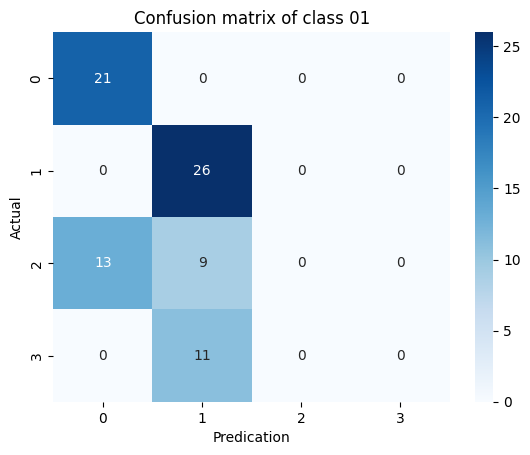

classification report of class 01 
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        21
           1       0.57      1.00      0.72        26
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        11

    accuracy                           0.59        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.35      0.59      0.44        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [105]:
pred01,_=model_OVO(x_train01,y_train01,x_test,y_test,'01')

### # class 0 vs class 2

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


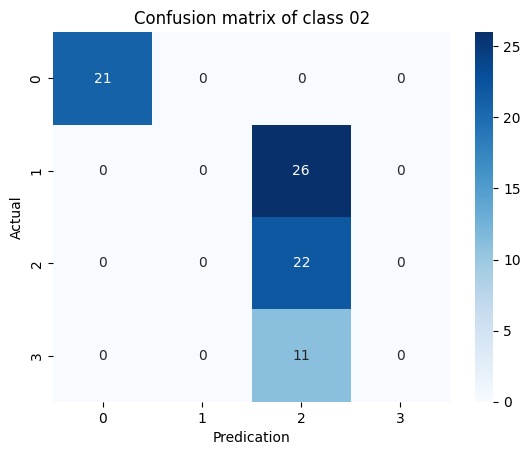

classification report of class 02 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        26
           2       0.37      1.00      0.54        22
           3       0.00      0.00      0.00        11

    accuracy                           0.54        80
   macro avg       0.34      0.50      0.39        80
weighted avg       0.37      0.54      0.41        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [106]:
pred02,_=model_OVO(x_train02,y_train02,x_test,y_test,'02')

### # class 0 vs class 3

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


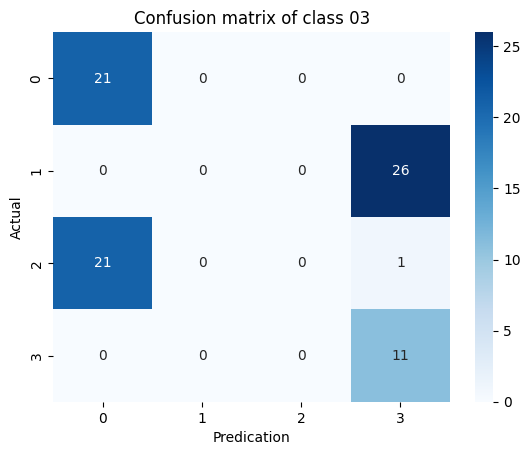

classification report of class 03 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        21
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        22
           3       0.29      1.00      0.45        11

    accuracy                           0.40        80
   macro avg       0.20      0.50      0.28        80
weighted avg       0.17      0.40      0.24        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [107]:
pred03,_=model_OVO(x_train_03,y_train_03,x_test,y_test,'03')

### # class 1 vs class 2

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


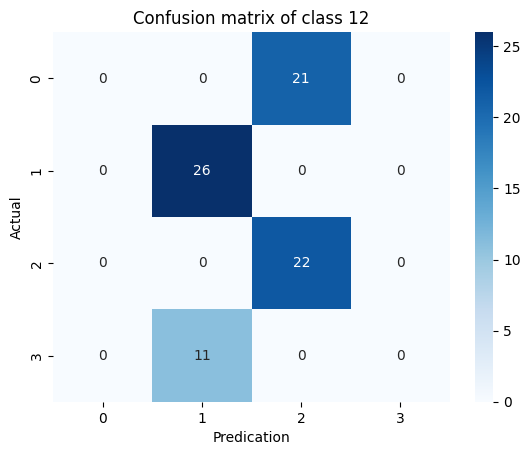

classification report of class 12 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.70      1.00      0.83        26
           2       0.51      1.00      0.68        22
           3       0.00      0.00      0.00        11

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.38        80
weighted avg       0.37      0.60      0.45        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [108]:
pred12,_=model_OVO(x_train12,y_train12,x_test,y_test,'12')

### # class 1 vs class 3

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


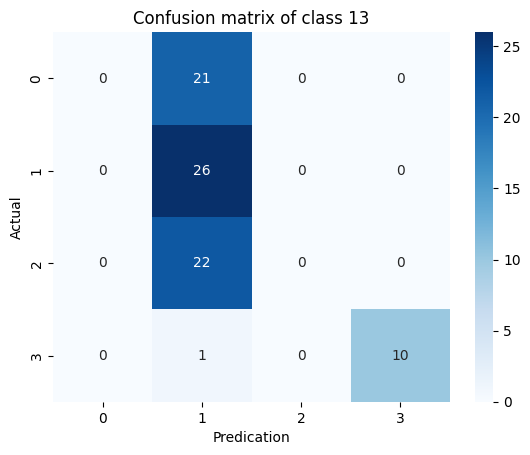

classification report of class 13 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.37      1.00      0.54        26
           2       0.00      0.00      0.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.45        80
   macro avg       0.34      0.48      0.37        80
weighted avg       0.26      0.45      0.31        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [109]:
pred13,_=model_OVO(x_train13,y_train13,x_test,y_test,'13')

### # class 2 vs class 3

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


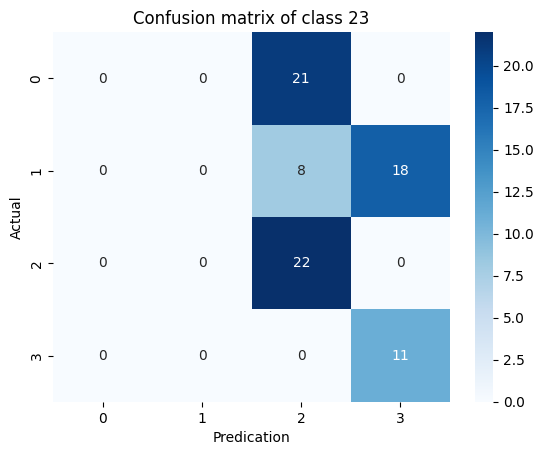

classification report of class 23 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        26
           2       0.43      1.00      0.60        22
           3       0.38      1.00      0.55        11

    accuracy                           0.41        80
   macro avg       0.20      0.50      0.29        80
weighted avg       0.17      0.41      0.24        80



c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [110]:
pred23,_=model_OVO(x_train_23,y_train_23,x_test,y_test,'23')

In [117]:
prop0=((pred01[:,0])+(pred02[:,0])+(pred03[:,0])/3).reshape(-1,1)
prop1=((pred01[:,1])+(pred12[:,0])+(pred13[:,0])/3).reshape(-1,1)
prop2=((pred02[:,1])+(pred12[:,1])+(pred23[:,0])/3).reshape(-1,1)
prop3=((pred03[:,1])+(pred13[:,1])+(pred23[:,1])/3).reshape(-1,1)

In [119]:
ypp=np.hstack((prop0,prop1,prop2,prop3))
ypp

array([[1.26591726, 0.41064665, 2.23555197, 0.2509396 ],
       [0.37703682, 1.26355292, 2.28212758, 0.23023968],
       [1.21726884, 0.44269592, 2.29555429, 0.12732624],
       [0.21976206, 1.9433968 , 0.84692182, 2.30890016],
       [2.22352349, 0.25818738, 1.40843779, 0.32062269],
       [2.31593746, 0.24046054, 1.2873965 , 0.41445803],
       [0.42742289, 1.26353225, 2.22528504, 0.24816594],
       [2.30928908, 0.25425323, 1.30017463, 0.39260676],
       [0.04561719, 2.29763558, 1.22476628, 1.0455758 ],
       [1.07035202, 0.5882337 , 2.30594313, 0.10293441],
       [0.45194151, 1.23467   , 2.23546559, 0.23125323],
       [0.15309138, 2.00295981, 1.63590227, 0.61864395],
       [2.2515851 , 0.25519895, 1.3688925 , 0.36284769],
       [0.14939377, 1.97864106, 0.89222935, 2.27962382],
       [2.19213503, 0.26010255, 1.44151667, 0.31102778],
       [0.08933408, 2.228975  , 1.39998003, 0.80937897],
       [0.52801242, 1.11989606, 2.29318337, 0.17575591],
       [2.30662778, 0.25612903,

In [122]:
m=np.argmax(ypp,axis=1)
f=m.reshape(-1,1)
f

array([[2],
       [2],
       [2],
       [3],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [3],
       [0],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [1]], dtype=int64)

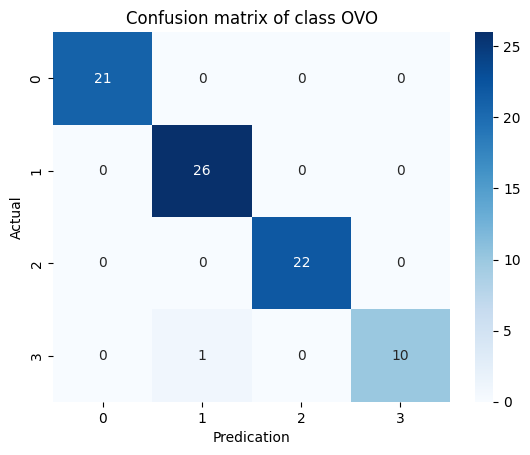

classification report of class OVO 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        22
           3       1.00      0.91      0.95        11

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



In [123]:
evaluation(y_test,f,'OVO')

# conclusion


## OVR (One-vs-Rest):
### In the OVR strategy, also known as the One-vs-All strategy, a binary classifier is trained for each class in the dataset. Each classifier is trained to distinguish between one specific class and the rest of the classes. 

### For example, if you have a multiclass classification problem with three classes (A, B, and C), you would train three binary classifiers: one to distinguish class A from classes B and C, another to distinguish class B from classes A and C, and a third to distinguish class C from classes A and B.

### During prediction, each classifier is used to make a prediction, and the class with the highest confidence score is selected as the final predicted class.

## OVO (One-vs-One):

### In the OVO strategy, also known as the All-Pairs strategy, a binary classifier is trained for each pair of classes in the dataset.
### For example, if you have a multiclass classification problem with three classes (A, B, and C), you would train three binary classifiers: one to distinguish class A from class B, another to distinguish class A from class C, and a third to distinguish class B from class C.
### During prediction, each classifier is used to make a prediction, and a voting scheme is used to determine the final predicted class. The class that receives the most votes from the binary classifiers is selected as the final predicted class.